In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
airline_tweets = pd.read_csv(r'C:\Users\SMONIGAYATHRI\OneDrive\Desktop\Major Project\sentiment analysis\Tweets.csv')
airline_tweets.head()

In [3]:
plot_size=plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0]=8
plot_size[1]=6
plt.rcParams["figure.figsize"]=plot_size

6.0
4.0


<AxesSubplot:ylabel='airline'>

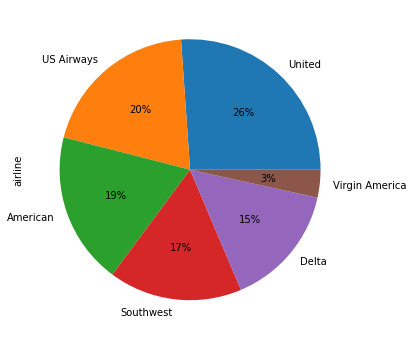

In [4]:
airline_tweets.airline.value_counts().plot(kind='pie',autopct="%1.0f%%")

<AxesSubplot:ylabel='airline_sentiment'>

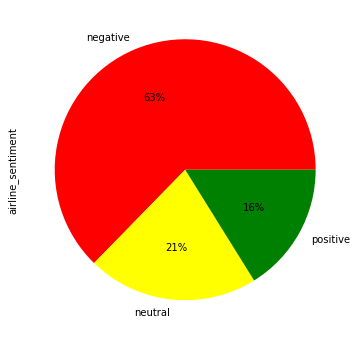

In [5]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","yellow","green"])

<AxesSubplot:xlabel='airline'>

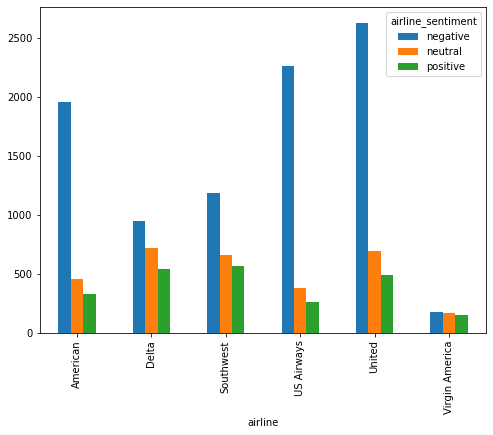

In [6]:
airline_sentiment=airline_tweets.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

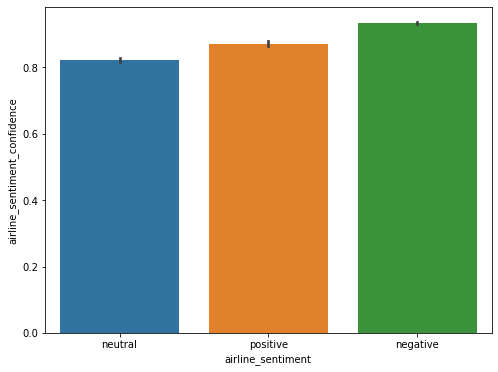

In [7]:
import seaborn as sns
sns.barplot(x='airline_sentiment',y='airline_sentiment_confidence', data=airline_tweets)

In [8]:
features=airline_tweets.iloc[:,10].values
labels=airline_tweets.iloc[:,1].values

In [9]:
processed_features=[]
for sentence in range(0, len(features)):
    processed_feature=re.sub(r'\W', ' ', str(features[sentence]))
    processed_feature=re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature=re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature=re.sub(r'\s+', ' ', processed_feature,flags=re.I)
    processed_feature=re.sub(r'^b\s+', '', processed_feature)
    processed_feature=processed_feature.lower()
    processed_features.append(processed_feature)

    

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


<AxesSubplot:xlabel='negativereason', ylabel='count'>

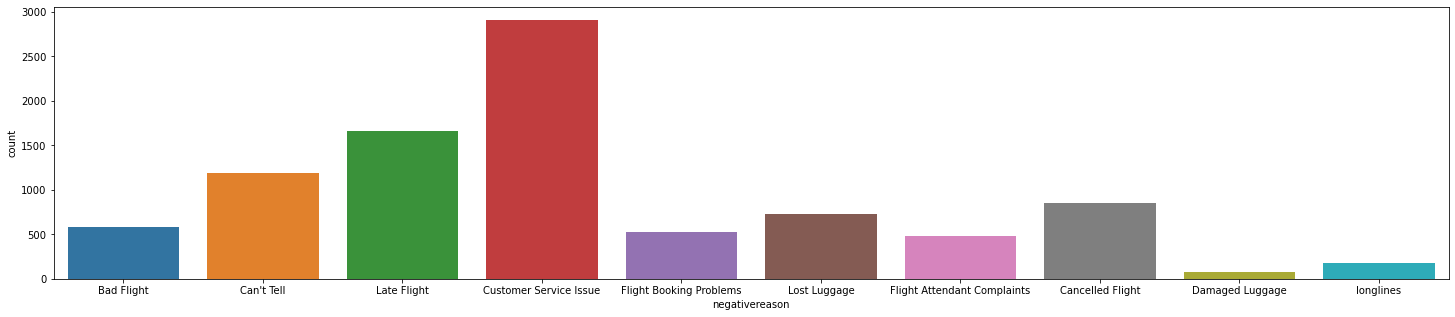

In [10]:
import warnings
warnings.filterwarnings("ignore")
print(airline_tweets.negativereason.value_counts())
plt.figure(figsize=(25,5))
sns.countplot(airline_tweets.negativereason)

In [11]:
import warnings
warnings.filterwarnings("ignore")
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SMONIGAYATHRI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


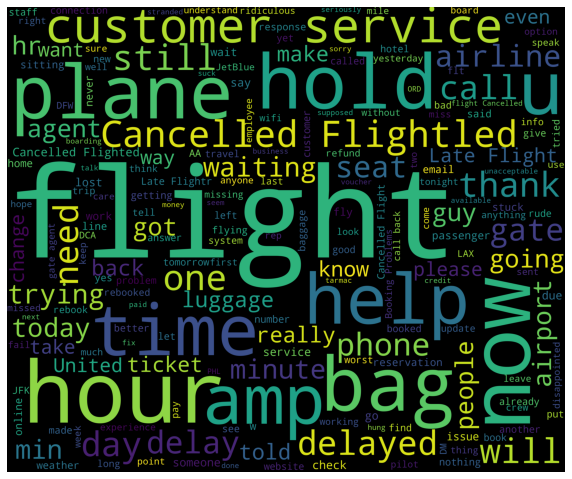

In [12]:
new_data=airline_tweets[airline_tweets['airline_sentiment']=='negative']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                      ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

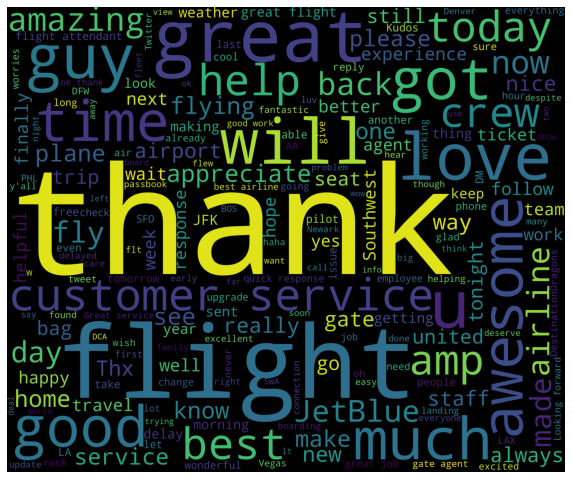

In [13]:
new_data=airline_tweets[airline_tweets['airline_sentiment']=='positive']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

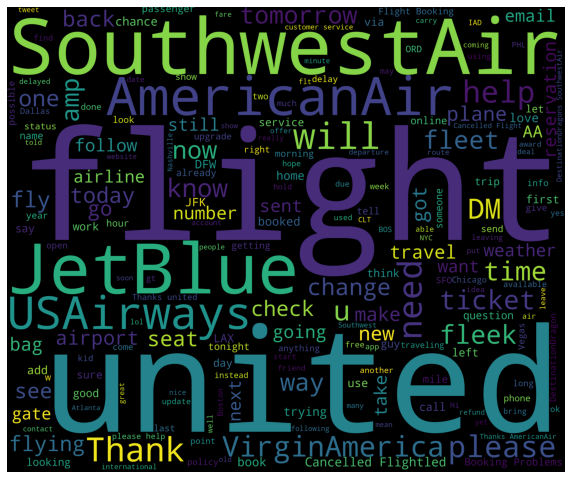

In [14]:
neutral_text=airline_tweets[airline_tweets['airline_sentiment']=='neutral']
words=''.join(neutral_text['text'])
cleaned_word=' '.join([word for word in words.split()
                      if 'http' not in word
                       and not word.startswith('@')
                        and word!='RT'])
wordcloud=WordCloud(stopwords=STOPWORDS,
                    background_color='black',
                      width=3000,
                      height=2500).generate(cleaned_word)
plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [16]:
def preprocess(x,stem=False):
    x=re.sub(text_cleaning_re,'  ',str(x).lower()).strip()
    tokens=[]
    for token in x.split('\n'):
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
        return '  '.join(tokens)
airline_tweets.text=airline_tweets.text.apply(lambda x:preprocess(x))

In [17]:
airline_tweets['sentiment']=airline_tweets['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [18]:
print(airline_tweets.sentiment.value_counts())

0    9178
1    5462
Name: sentiment, dtype: int64


In [19]:
y=airline_tweets.sentiment

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X= vectorizer.fit_transform(airline_tweets.text)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [26]:
import sklearn
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [27]:
score = model.score(X_test, y_test)
score

0.7930327868852459

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1870
           1       0.88      0.50      0.63      1058

    accuracy                           0.79      2928
   macro avg       0.82      0.73      0.75      2928
weighted avg       0.81      0.79      0.78      2928



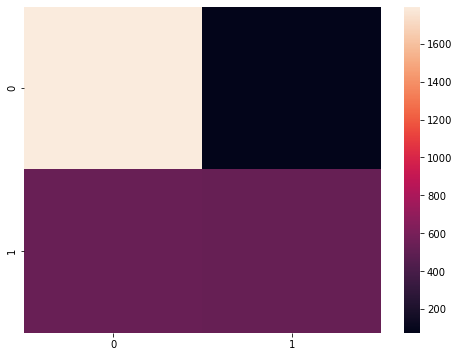

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

In [29]:
from sklearn.ensemble import RandomForestClassifier
models=RandomForestClassifier()
models.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
score = models.score(X_test, y_test)
score

0.8012295081967213

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1870
           1       0.88      0.50      0.63      1058

    accuracy                           0.79      2928
   macro avg       0.82      0.73      0.75      2928
weighted avg       0.81      0.79      0.78      2928



<AxesSubplot:>

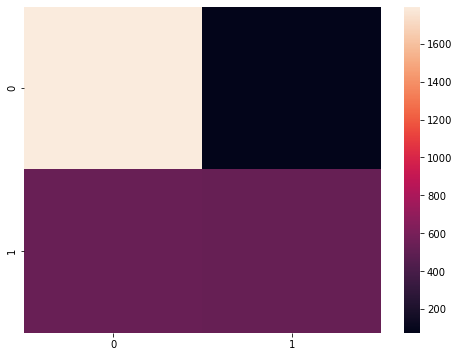

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))

In [32]:
from sklearn.svm import SVC
svm=SVC()
svm=SVC(kernel="rbf", C=0.025, probability=True)

In [33]:
svm.fit(X_train,y_train)

SVC(C=0.025, probability=True)

In [34]:
score = svm.score(X_test, y_test)
score

0.6536885245901639

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1870
           1       0.88      0.50      0.63      1058

    accuracy                           0.79      2928
   macro avg       0.82      0.73      0.75      2928
weighted avg       0.81      0.79      0.78      2928



<AxesSubplot:>

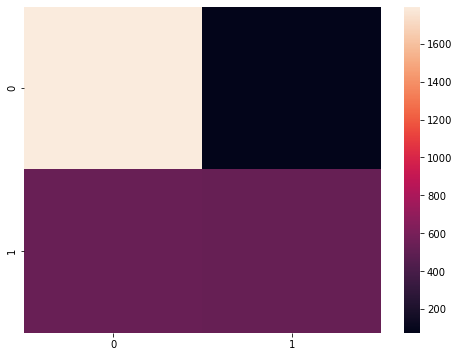

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, model.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)))

In [36]:
from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 5)#no of neighbors is hpyer parameter
text_classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
predictions2 = text_classifier2.predict(X_test)

In [38]:
score = text_classifier2.score(X_test, y_test)
score

0.4217896174863388

[[ 247 1623]
 [  70  988]]
              precision    recall  f1-score   support

           0       0.78      0.13      0.23      1870
           1       0.38      0.93      0.54      1058

    accuracy                           0.42      2928
   macro avg       0.58      0.53      0.38      2928
weighted avg       0.63      0.42      0.34      2928

0.4217896174863388


<AxesSubplot:>

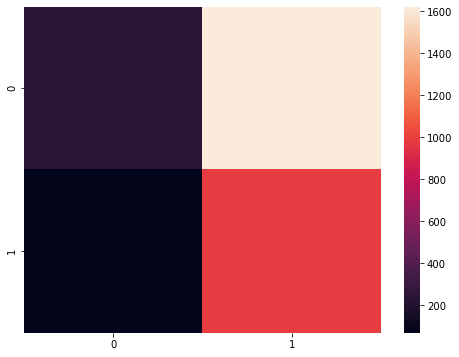

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))
sns.heatmap(confusion_matrix(y_test, predictions2))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
models=RandomForestClassifier()
model.fit(X_train,y_train,epochs=20,batch_size=32,verbose = 5)
model.save("sentiment.h5")